# First working model: using  a CNN with the architecture conv-pull-conv-pull-fc having relu as the only nonlinearity

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from Config import Config
from CNN import CNNModel, train_model, check_valid, test_prediction
from DataHolder import DataHolder
from Config import Config
from JpgTransformer import JpgTransformer
from util import randomize_in_place, plot9images
import matplotlib.pyplot as plt
import shutil
%matplotlib inline

## We will use the jpg dataset with images of size 28x28 

In [3]:
transformer = JpgTransformer(image_base_size=28)
file_name = transformer.file_name 
    
with open(file_name, 'rb') as s:
    d = pickle.load(s)
    pass
X_train = d['X_train'] 
y_train = d['y_train'] 
X_test = d['X_test']
del d

## Printing some examples

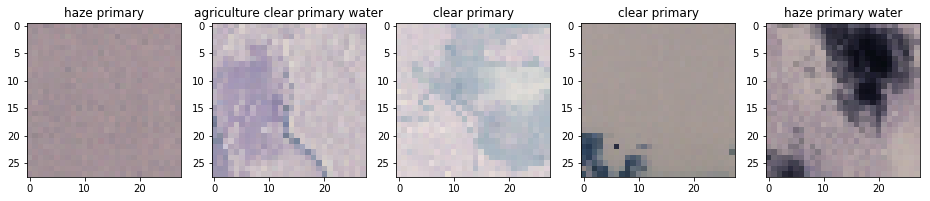

In [5]:
examples = X_train[0:5]
example_cls = ["haze primary",
               "agriculture clear primary water",
               "clear primary",
               "clear primary",
               "haze primary water"]
tuples = list(zip(examples,example_cls))
fig = plt.figure()
fig.set_size_inches(16, 4)
for i, (x, c) in enumerate((tuples) ):
    a = fig.add_subplot(1, 5, i+1)
    a.set_title(c)
    plt.imshow(x)

## The images are normalized 

In [6]:
for image in examples:
    print("mean = ", np.mean(image))
    print("std = ", np.std(image))

mean =  0.601309
std =  0.0314707
mean =  0.728718
std =  0.0649978
mean =  0.786565
std =  0.0536803
mean =  0.591128
std =  0.075854
mean =  0.496025
std =  0.192415


## Spliting the data in train and valid datasets

In [7]:
randomize_in_place(X_train,y_train,0)
X_valid, y_valid = X_train[40000: 40479], y_train[40000: 40479]
X_train, y_train = X_train[0:40000], y_train[0:40000]
print("image shape train = ", X_train.shape)
print("label shape train = ", y_train.shape)
print("image shape valid = ", X_valid.shape)
print("label shape valid = ", y_valid.shape)

image shape train =  (40000, 28, 28, 3)
label shape train =  (40000, 17)
image shape valid =  (479, 28, 28, 3)
label shape valid =  (479, 17)


## A very small trainig 

In [8]:
lr = 0.0928467676
my_dataholder = DataHolder(X_train,
                       y_train,
                       X_valid, 
                       y_valid,
                       X_test)
my_config = Config(batch_size=120,
                   learning_rate=lr,
                   image_size=28)
my_model = CNNModel(my_config, my_dataholder)
train_model(my_model, my_dataholder, 11, 5)

Start training
step  batch_F2  valid_F2  elapsed_time
  0   0.41        0.41*    0.20(s)
  5   0.39        0.37    0.18(s)
 10   0.62        0.61*    0.18(s)

&&&&&&&&& #training steps = 11 &&&&&&&&&&&
training time: 0:0:0:21 (DAYS:HOURS:MIN:SEC)

&&&&&&&&& For TensorBoard visualization type &&&&&&&&&&&

tensorboard  --logdir=logs/22-05-2017_11-23-14



## Creating one submission

In [ ]:
test_pred = test_prediction(my_model)
test_pred.shape

In [ ]:
create_submission(test_pred)
submission_data = pd.read_csv('submission.csv')
submission_data.head()

## A small training with different learning rates

In [7]:
shutil.rmtree("./logs")
number_of_exp = 4
LR = [4.15769225e-04, 5.11853368e-02, 9.28467676e-02, 5.36553748e-01]
my_dataholder = DataHolder(X_train,
                       y_train,
                       X_valid, 
                       y_valid,
                       X_valid, 
                       y_valid)
for i, lr in enumerate(LR):
    log_path = './logs/' + str(lr)
    header1 = "\n=============== ({0} of {1}) ===============\n".format(i + 1, number_of_exp)
    header2 = "  learning rate = {}".format(lr)
    header3 = "\n=========================================\n"
    print(header1 + header2 + header3)
    my_config = Config(log_path=log_path,
                       learning_rate=lr,
                       image_size=28)
    my_model = CNNModel(my_config, my_dataholder)
    train_model(my_model, my_dataholder, 10001, 1000)
    print("check_valid = ", check_valid(my_model))



=============== (1 of 4) ===============
  learning rate = 0.000415769225

Start training
step  batch_F2  valid_F2  elapsed_time
  0   0.39        0.38*    0.37(s)
100   0.60        0.60*    0.35(s)
200   0.58        0.61*    0.33(s)
300   0.59        0.61    0.34(s)

&&&&&&&&& #training steps = 301 &&&&&&&&&&&
training time: 0:0:1:45 (DAYS:HOURS:MIN:SEC)

&&&&&&&&& For TensorBoard visualization type &&&&&&&&&&&

tensorboard  --logdir=./logs/0.000415769225

check_valid =  0.6114659604299736

=============== (2 of 4) ===============
  learning rate = 0.0511853368

Start training
step  batch_F2  valid_F2  elapsed_time
  0   0.53        0.54*    0.61(s)
100   0.61        0.61*    0.35(s)
200   0.57        0.61    0.34(s)
300   0.59        0.61*    0.35(s)

&&&&&&&&& #training steps = 301 &&&&&&&&&&&
training time: 0:0:1:49 (DAYS:HOURS:MIN:SEC)

&&&&&&&&& For TensorBoard visualization type &&&&&&&&&&&

tensorboard  --logdir=./logs/0.0511853368

check_valid =  0.6097751405371642

=========

In [8]:
# !tensorboard  --logdir=./logs/

## Looking at the Loss function when using Adagrad with different learning rates:


- orange: 0.000521100831039


- light blue: 0.000936164462254


- purple: 0.00800265995899


- blue: 0.0090032433183


- green: 0.0255160826922


- yellow: 0.0478045161634





![image](./pictures/loss.png)